In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data=pd.read_csv("Complexes_0413_2022.csv")
data=data.replace("None",np.nan)
data=data[data[ "subunits(UniProt IDs)"]!=np.nan]
data=data[[len(x.split(';'))>=5 for x in data[ "subunits(UniProt IDs)"] ]]
data=data.reset_index(drop=True)
# data.head()

In [5]:
utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst"]]
utmb_list= pd.read_csv("Protein_List.utmb.0311_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["Portien"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names"]]
utmb_data=utmb_data.reset_index(drop=True)

In [6]:
#search
found_list={}

for i in range(utmb_data.shape[0]):
    
    for j in range(data.shape[0]):
        temp=(data[ "subunits(UniProt IDs)"][j]).split(';')
        if(utmb_data["Entry"][i] in temp):
            if(data["ComplexID"][j] in found_list.keys()):
                found_list[data["ComplexID"][j]]["protiens"].append(utmb_data["Entry"][i])
                found_list[data["ComplexID"][j]]["protiens_name"].append(utmb_data["Entry name"][i])
                found_list[data["ComplexID"][j]]["k"].append(float(utmb_data["rateconst"][i]))
            else:
                found_list[data["ComplexID"][j]]={"name":data["ComplexName"][j],
                                                  "protiens":[utmb_data["Entry"][i]],
                                                  "protiens_name":[utmb_data["Entry name"][i]],
                                                  "k":[ float(utmb_data["rateconst"][i])]}
#             found_list.append([data["ComplexName"][j],data["ComplexID"][j],utmb_data["Entry"][i],utmb_data["rateconst"][i]
#                                ])
        

In [7]:
len(found_list.keys())

53

In [8]:
Filtered_vals = dict()

for new_ke, new_val in found_list.items():
    
    if len(new_val["protiens"])>5:
        Filtered_vals[new_ke] = new_val

In [9]:
df=pd.DataFrame(Filtered_vals)
df=df.transpose()
df=df.reset_index()
df

,index,name,protiens,protiens_name,k
0,3146,Coatomer-Arf1 complex,"[P84078, Q8CIE6, O55029, Q9JIF7, Q5XJY5, O8907...","[ARF1_MOUSE, COPA_MOUSE, COPB2_MOUSE, COPB_MOU...","[0.528111, 0.419825, 0.11471, 0.438532, 0.4108..."
1,413,"(ER)-localized multiprotein complex, Ig heavy ...","[P20029, Q99KV1, P08113, Q9JKR6, P09103, P0800...","[BIP_MOUSE, DJB11_MOUSE, ENPL_MOUSE, HYOU1_MOU...","[0.43746, 0.322184, 0.375641, 0.414183, 0.4230..."
2,414,"(ER)-localized multiprotein complex, in absenc...","[P20029, P08113, Q9JKR6, P09103, P08003, P2436...","[BIP_MOUSE, ENPL_MOUSE, HYOU1_MOUSE, PDIA1_MOU...","[0.43746, 0.375641, 0.414183, 0.423001, 0.4343..."
3,3145,Coatomer complex,"[Q8CIE6, O55029, Q9JIF7, Q5XJY5, O89079, Q9QZE5]","[COPA_MOUSE, COPB2_MOUSE, COPB_MOUSE, COPD_MOU...","[0.419825, 0.11471, 0.438532, 0.410846, 0.2860..."
4,538,"Cytochrome c oxidase, mitochondrial","[P00405, P19783, P12787, P19536, Q9CPQ1, P4302...","[COX2_MOUSE, COX41_MOUSE, COX5A_MOUSE, COX5B_M...","[0.074373, 0.143172, 0.250622, 0.118104, 0.163..."
5,40,"COP9 signalosome complex (Gps1, Cops1, Cops2, ...","[P61202, O88543, O88544, O35864, O88545, Q8VBV7]","[CSN2_MOUSE, CSN3_MOUSE, CSN4_MOUSE, CSN5_MOUS...","[0.0, 0.251251, 0.298108, 0.560267, 0.228769, ..."
6,495,"Cytochrome bc1-complex, mitochondrial","[Q9D0M3, Q9CZ13, Q9DB77, Q9D855, Q9CQ69, Q8R1I...","[CY1_MOUSE, QCR1_MOUSE, QCR2_MOUSE, QCR7_MOUSE...","[0.112568, 0.101595, 0.16756, 0.253361, 0.1475..."
7,3029,Drosha complex,"[Q501J6, Q61656, O35286, O35737, Q9D0E1, Q921F2]","[DDX17_MOUSE, DDX5_MOUSE, DHX15_MOUSE, HNRH1_M...","[1.327065, 1.725335, 0.415308, 0.371442, 0.274..."
8,3047,Parvulin-associated pre-rRNP complex,"[Q9JIK5, Q61656, Q9D8N0, P35550, P11276, Q7TPV...","[DDX21_MOUSE, DDX5_MOUSE, EF1G_MOUSE, FBRL_MOU...","[0.52597, 1.725335, 0.104508, 0.212225, 0.8568..."
9,381,"Respiratory chain complex I, mitochondrial","[Q9CQ75, Q62425, Q9CPP6, Q9CQZ5, Q9DCJ5, Q9DC6...","[NDUA2_MOUSE, NDUA4_MOUSE, NDUA5_MOUSE, NDUA6_...","[0.083147, 0.557361, 0.163865, 0.324781, 0.125..."


In [38]:

df["k_sd"]=0
df["k_median"]=0
df["k_mean_val"]=0

for i in range(df.shape[0]):
    temp= np.array( df.k[i]) 
    
    df.k_mean_val[i]= np.mean(temp)
    df.k_median[i]= np.median(temp )
    df.k_sd[i]= np.std( temp)
    
df[["name","k","k_sd","k_median","protiens_name"]]

C:\Users\hmdebern.UTMB-USERS-M\AppData\Local\Temp\ipykernel_43416\3324559751.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.k_mean_val[i]= np.mean(temp)
C:\Users\hmdebern.UTMB-USERS-M\AppData\Local\Temp\ipykernel_43416\3324559751.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.k_median[i]= np.median(temp )
C:\Users\hmdebern.UTMB-USERS-M\AppData\Local\Temp\ipykernel_43416\3324559751.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,name,k,k_sd,k_median,protiens_name
0,Coatomer-Arf1 complex,"[0.528111, 0.419825, 0.11471, 0.438532, 0.4108...",0.123340,0.410846,"[ARF1_MOUSE, COPA_MOUSE, COPB2_MOUSE, COPB_MOU..."
1,"(ER)-localized multiprotein complex, Ig heavy ...","[0.43746, 0.322184, 0.375641, 0.414183, 0.4230...",0.053474,0.394250,"[BIP_MOUSE, DJB11_MOUSE, ENPL_MOUSE, HYOU1_MOU..."
2,"(ER)-localized multiprotein complex, in absenc...","[0.43746, 0.375641, 0.414183, 0.423001, 0.4343...",0.052610,0.404216,"[BIP_MOUSE, ENPL_MOUSE, HYOU1_MOUSE, PDIA1_MOU..."
3,Coatomer complex,"[0.419825, 0.11471, 0.438532, 0.410846, 0.2860...",0.113470,0.400706,"[COPA_MOUSE, COPB2_MOUSE, COPB_MOUSE, COPD_MOU..."
4,"Cytochrome c oxidase, mitochondrial","[0.074373, 0.143172, 0.250622, 0.118104, 0.163...",0.055282,0.163265,"[COX2_MOUSE, COX41_MOUSE, COX5A_MOUSE, COX5B_M..."
5,"COP9 signalosome complex (Gps1, Cops1, Cops2, ...","[0.0, 0.251251, 0.298108, 0.560267, 0.228769, ...",0.163313,0.255334,"[CSN2_MOUSE, CSN3_MOUSE, CSN4_MOUSE, CSN5_MOUS..."
6,"Cytochrome bc1-complex, mitochondrial","[0.112568, 0.101595, 0.16756, 0.253361, 0.1475...",0.046482,0.147555,"[CY1_MOUSE, QCR1_MOUSE, QCR2_MOUSE, QCR7_MOUSE..."
7,Drosha complex,"[1.327065, 1.725335, 0.415308, 0.371442, 0.274...",0.575301,0.393375,"[DDX17_MOUSE, DDX5_MOUSE, DHX15_MOUSE, HNRH1_M..."
8,Parvulin-associated pre-rRNP complex,"[0.52597, 1.725335, 0.104508, 0.212225, 0.8568...",0.329864,0.106820,"[DDX21_MOUSE, DDX5_MOUSE, EF1G_MOUSE, FBRL_MOU..."
9,"Respiratory chain complex I, mitochondrial","[0.083147, 0.557361, 0.163865, 0.324781, 0.125...",0.167176,0.163865,"[NDUA2_MOUSE, NDUA4_MOUSE, NDUA5_MOUSE, NDUA6_..."


In [39]:
complex_name=[]
complex_data=[]

for i in range(df.shape[0]):
    if(df.name[i] not in complex_name):
        complex_name.append(df.name[i])
        complex_data.append(df.k[i])

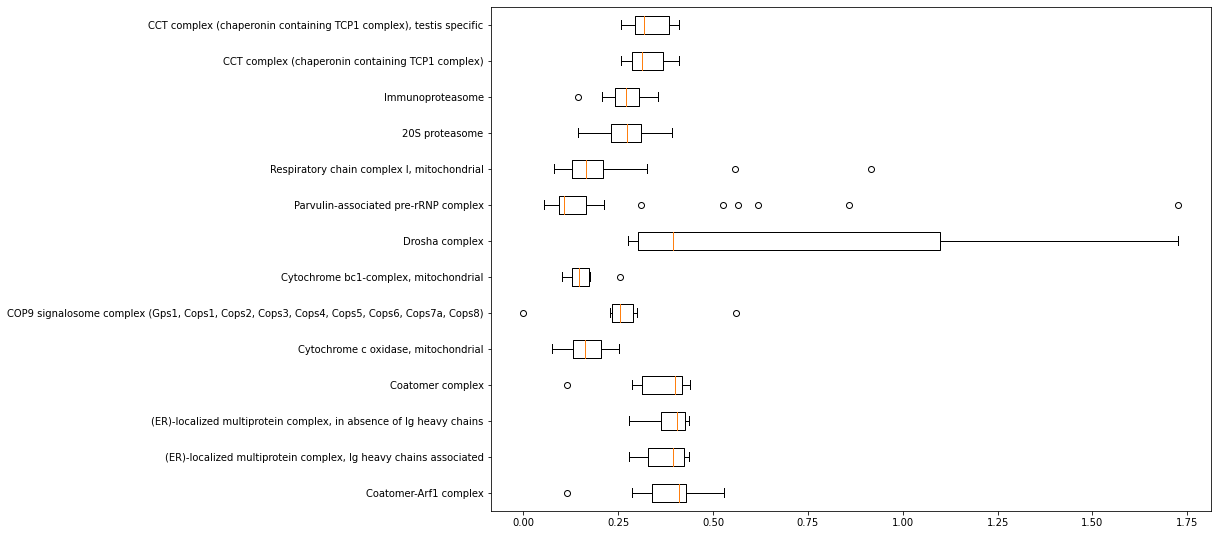

In [40]:

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([1, 1, 1, 1])

# Creating plot
bp = ax.boxplot(complex_data,vert =False)
plt.yticks(range(1,len(complex_name)+1), complex_name) 
 
# show plot
plt.show()

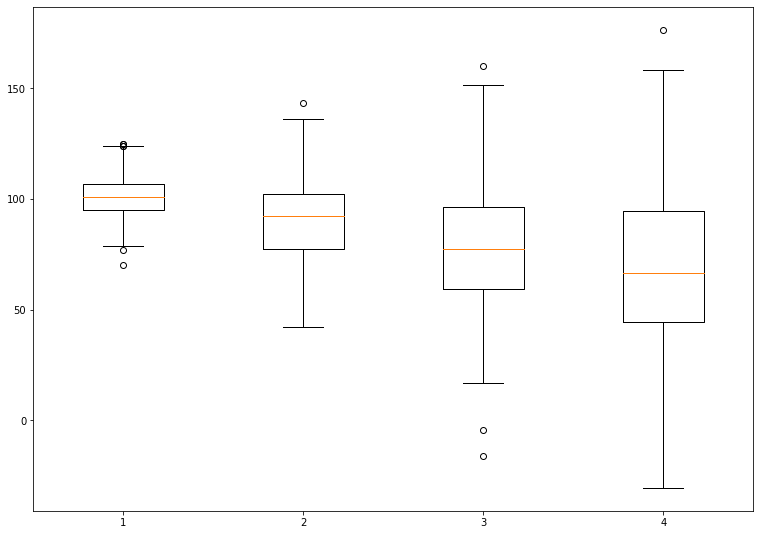

In [41]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

[[1.327065, 1.725335, 0.415308, 0.371442, 0.274536, 0.278744]]

In [42]:
x=list(df[df.name=='Drosha complex']['protiens_name'])
x

[['DDX17_MOUSE',
  'DDX5_MOUSE',
  'DHX15_MOUSE',
  'HNRH1_MOUSE',
  'HNRPM_MOUSE',
  'TADBP_MOUSE']]

In [45]:
x=list(df[df.name=='Drosha complex']['k'])
x

[[1.327065, 1.725335, 0.415308, 0.371442, 0.274536, 0.278744]]

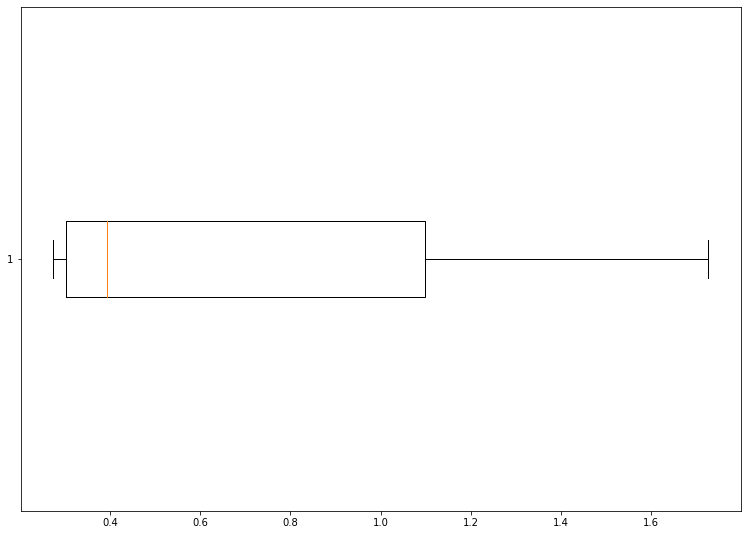

In [46]:

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([1, 1, 1, 1])

# Creating plot
bp = ax.boxplot(x,vert =False)
# plt.yticks(range(1,len(complex_name)+1), complex_name) 
 
# show plot
plt.show()